<a href="https://colab.research.google.com/github/kalsun/Python/blob/main/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Call fetch_housing_data to download and extract the data
fetch_housing_data()

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [4]:
print(housing["ocean_proximity"].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


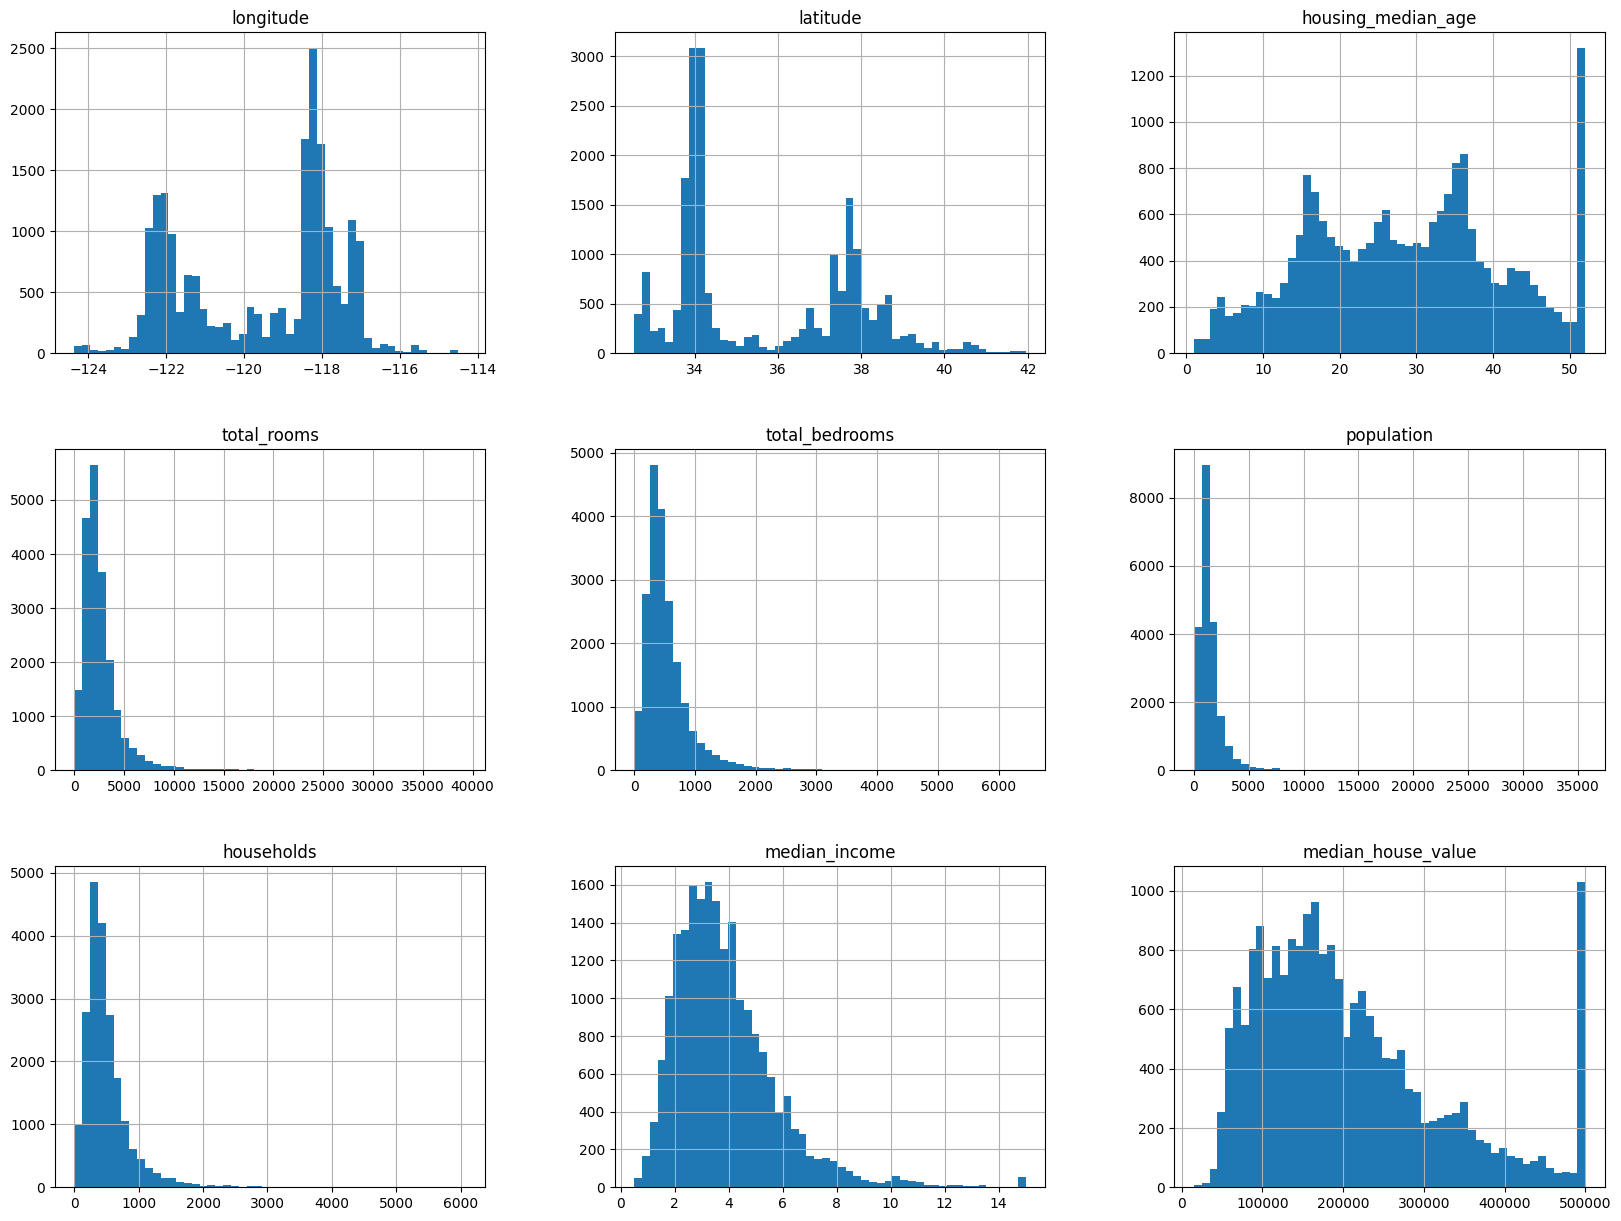

In [15]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

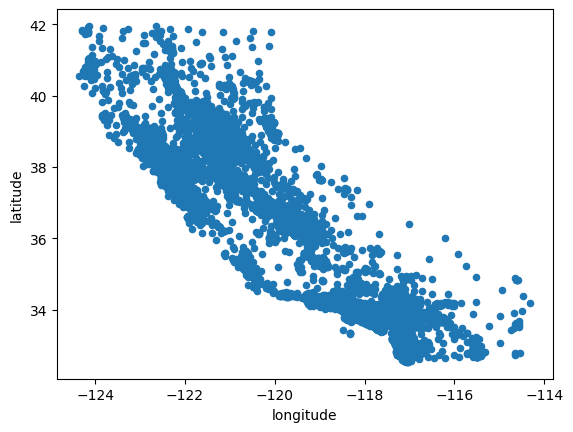

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

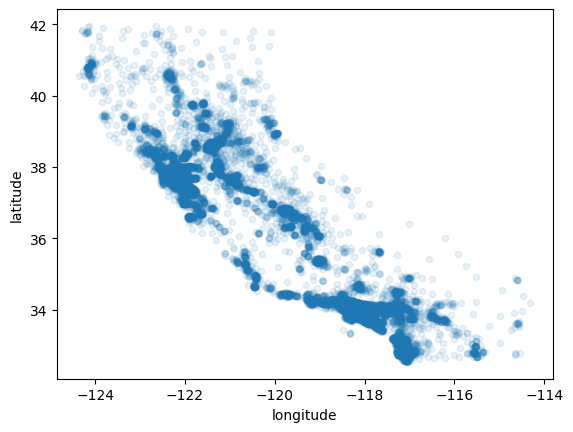

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

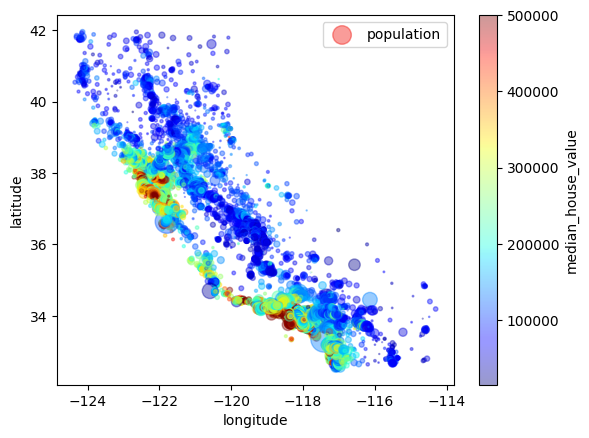

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [14]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

ValueError: could not convert string to float: 'NEAR BAY'

In [16]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [17]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [19]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
!pip install copybook
import copybook
text = """
       01  WORK-BOOK.
        10  TAX-RATE        PIC S9(13)V9(2)
                    SIGN LEADING SEPARATE.
        10  AMOUNT        PIC S9(4)V9(2).
"""
# copybook also provides a parse_file method that receives a text filename
root = copybook.parse_string(text)

# flatten returns a list of Fields and FieldGroups instead of traversing the tree
list_of_fields = root.flatten()

# dummy sample input
line = "          -13452987654"

# loop over the fields and parse the relevant position in the line
for field in list_of_fields:

  # FieldGroups are Copybook groups and contain Field objects as children
  if type(field)==copybook.Field:

    # each Field has a start_pos and a get_total_length method
    # to identify the position within the raw line input
    str_field = line[field.start_pos:field.start_pos+field.get_total_length()]

    # Field provides a parse method that returns a str, int, or float based on the PIC
    print(f"{field.name}: {field.parse(str_field)}")

TAX-RATE: -13.52
AMOUNT: 9876.54


In [ ]:
pip install pymannkendall
#create dataset
data = [31, 29, 28, 28, 27, 26, 26, 27, 27, 27, 28, 29, 30, 29, 30, 29, 28]

#perform Mann-Kendall Trend Test
import pymannkendall as mk

mk.original_test(data)

Mann_Kendall_Test(trend='no trend', h=False, p=0.422586268671707,
                  z=0.80194241623, Tau=0.147058823529, s=20.0,
                  var_s=561.33333333, slope=0.0384615384615, intercept=27.692307692)

In [ ]:
import numpy as np

def ccc(x, y):
  """Calculates the concordance correlation coefficient (CCC)."""
  sxy = np.sum((x - x.mean()) * (y - y.mean())) / x.shape[0]
  rho = np.corrcoef(x, y)[0, 1]
  x_var = np.var(x)
  y_var = np.var(y)
  mean_diff_sq = (x.mean() - y.mean()) ** 2
  return (2 * sxy) / (x_var + y_var + mean_diff_sq)

x = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 2.1, 3.3, 4.1, 5.2])

print(ccc(x, y))

0.9905894006934125


In [ ]:
from scipy.stats import pearsonr

def ccc(x, y):
  """Calculates the concordance correlation coefficient (CCC)."""
  sxy = np.sum((x - x.mean()) * (y - y.mean())) / x.shape[0]
  rho = pearsonr(x, y)[0]
  x_var = np.var(x)
  y_var = np.var(y)
  mean_diff_sq = (x.mean() - y.mean()) ** 2
  return (2 * sxy) / (x_var + y_var + mean_diff_sq)

x = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 2.1, 3.3, 4.1, 5.2])

print(ccc(x, y))

0.9905894006934125


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


def generate_datasets_for_training(data, window_size,scale=True, scaler_type=StandardScaler):
  _l = len(data)
  data = scaler_type().fit_transform(data)
  Xs = []
  Ys = []
  for i in range(0, (_l - window_size)):
    # because this is an autoencoder - our Ys are the same as our Xs. No need to pull the next sequence of values
    Xs.append(data[i:i+window_size])
    Ys.append(data[i:i+window_size])
  tr_x, ts_x, tr_y, ts_y = [np.array(x) for x in train_test_split(Xs, Ys)]
  assert tr_x.shape[2] == ts_x.shape[2] == (data.shape[1] if (type(data) == np.ndarray) else len(data))
  return  (tr_x.shape[2], tr_x, tr_y, ts_x, ts_y)

In [ ]:
feats, X, Y, XX, YY = generate_datasets_for_training(_es, 4)

In [ ]:
epochs = 100
batch_size = 32
window_length = 4
from keras import metrics
import keras
import tensorflow as tf
import os

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=1e-2, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True)

feats, X, Y, XX, YY = generate_datasets_for_training(_es, 4)

model = keras.Sequential()
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', batch_input_shape=(None, window_length, feats), return_sequences=True, name='encoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
model.add(keras.layers.RepeatVector(window_length, name='encoder_decoder_bridge'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(feats)))
model.compile(loss="mse",optimizer='adam')
model.build()
print(model.summary())

model.fit(x=X, y=Y, validation_data=(XX, YY), epochs=100, batch_size=batch_size, shuffle=True, callbacks=[early_stop])


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (LSTM)             (None, 4, 64)             23552     
_________________________________________________________________
encoder_2 (LSTM)             (None, 4, 32)             12416     
_________________________________________________________________
encoder_3 (LSTM)             (None, 16)                3136      
_________________________________________________________________
encoder_decoder_bridge (Repe (None, 4, 16)             0         
_________________________________________________________________
decoder_1 (LSTM)             (None, 4, 16)             2112      
_________________________________________________________________
decoder_2 (LSTM)             (None, 4, 32)             6272      
_________________________________________________________________
decoder_3 (LSTM)             (None, 4, 64)           

27
